# Modelo de Machine Learning - Classificador Multiclasse

Este documento visa desenvolver um modelo de Machine Learning capaz de classificar o nível de fadiga do motorista em três classes possíveis: 0 - Alerta; 1 - Cansado; 2 - Muito Cansado. 
Para isso, é importado um arquivo csv com as features previamente tratadas que serão usadas como entrada do classificador.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
plt.rcParams.update({'font.size': 12})

# Carregando arquivo com as Features

## Features obtidas

- EAR (%)
- Taxa de piscadas (piscadas/seg)
- Duração de piscadas

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# arquivo de armazenamento dos dados filtrados: dados_limpos.csv
df = pd.read_csv('features_calculadas_v1.csv', usecols=[3,4,5,10,12])

In [4]:
df

,nome_video,y,ear_porc,taxa_piscadas,duracao_media_piscadas
0,59/0.MOV,0,61.217944,0.00,0.000000
1,59/0.MOV,0,102.096270,0.00,0.000000
2,59/0.MOV,0,100.238718,0.00,0.000000
3,59/0.MOV,0,93.716615,0.00,0.000000
4,59/0.MOV,0,73.352408,0.00,0.000000
...,...,...,...,...,...
163237,40/5.mp4,1,85.496092,0.25,0.246667
163238,40/5.mp4,1,78.341464,0.25,0.246667
163239,40/5.mp4,1,86.304800,0.25,0.246667
163240,40/5.mp4,1,88.264548,0.25,0.246667


In [5]:
df = df.dropna()

In [6]:
X = df.drop(['y','nome_video'], axis=1)
y = df['y']
videos = df['nome_video']

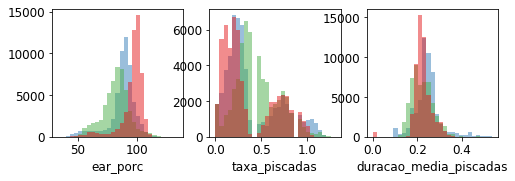

In [7]:
def plot_hist(X, y):
    bins = np.linspace(X.min(), X.max(), 30)
    for c in y.value_counts().index:
        plt.hist(X[y == c].values, bins=bins, label=str(c), 
                 alpha=0.5, color=plt.cm.Set1.colors[c])

def plot_scatter(X, y):
    cols = X.columns
    n = len(cols)
    for i in range(n):
        plt.subplot(n, n, i+1)
        plot_hist(X[cols[i]], y)
        plt.xlabel(cols[i])
    
plt.figure(figsize=(8, 8))
plot_scatter(X, y)
plt.show()

# Separando treinamento e teste

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_SEED)

In [30]:
X_train

,ear_porc,taxa_piscadas,duracao_media_piscadas
90547,89.339750,0.35,0.152381
16937,100.845266,0.65,0.200000
16941,95.701782,0.65,0.205128
82781,76.556550,0.55,0.212121
140269,81.727677,0.30,0.194444
...,...,...,...
56276,72.795861,0.30,0.244444
149969,44.401593,0.25,0.258333
52815,110.256964,0.70,0.533333
79686,59.482086,0.40,0.150000


# Classificação multiclasse

São testados dois modelos (Regressão Logística e Random Forest Classifier) para comparar seus desempenhos. 

## Regressão Logística

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(random_state=RANDOM_SEED)

In [32]:
log_reg_clf.fit(X_train, y_train)
y_pred = log_reg_clf.predict(X_val)

C:\Users\Rebeca Moreno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('LogisticRegression')
print('Acurácia: {:4f}'.format(accuracy_score(y_val, y_pred)))
print('Precision: {:4f}'.format(precision_score(y_val, y_pred, average='weighted')))
print('Recall: {:4f}'.format(recall_score(y_val, y_pred, average='weighted')))

LogisticRegression
Acurácia: 0.617213
Precision: 0.611183
Recall: 0.617213


In [34]:
y_proba = log_reg_clf.predict_proba(X_val)

In [35]:
y_proba

array([[0.80130711, 0.13359394, 0.06509895],
       [0.21339253, 0.45262818, 0.33397929],
       [0.33136869, 0.46251183, 0.20611948],
       ...,
       [0.03591423, 0.30670102, 0.65738476],
       [0.31868895, 0.35799787, 0.32331318],
       [0.18606277, 0.48991356, 0.32402367]])

In [36]:
log_reg_clf.score(X_val, y_val)

0.6172128613386922

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

In [38]:
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_val)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('RandomForest')
print('Acurácia: {:4f}'.format(accuracy_score(y_val, y_pred)))
print('Precision: {:4f}'.format(precision_score(y_val, y_pred, average='weighted')))
print('Recall: {:4f}'.format(recall_score(y_val, y_pred, average='weighted')))

RandomForest
Acurácia: 0.838460
Precision: 0.838713
Recall: 0.838460


In [40]:
y_proba = forest_clf.predict_proba(X_val)

In [41]:
y_proba

array([[1.  , 0.  , 0.  ],
       [0.06, 0.93, 0.01],
       [0.87, 0.05, 0.08],
       ...,
       [0.  , 0.97, 0.03],
       [0.  , 0.67, 0.33],
       [0.01, 0.99, 0.  ]])

In [43]:
forest_clf.score(X_val, y_val)

0.8384603493584789

In [45]:
list(zip(X_train, forest_clf.feature_importances_))

[('ear_porc', 0.5149572672889343),
 ('taxa_piscadas', 0.1951575383131688),
 ('duracao_media_piscadas', 0.28988519439789684)]